In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools

%matplotlib inline


# Probability Distributions

## Continuous (Probability) Distributions

 - Nerf gun
 - we know it will land *somewhere* between 5ft and 8 ft
 - whats the probability it will land at exactly 5.2456ft ?

In [2]:
np.random.rand(10)

array([ 0.58578311,  0.53500423,  0.61787088,  0.50652861,  0.86689918,
        0.93610072,  0.21372244,  0.41382984,  0.16407446,  0.13222845])

In [3]:
#I later realized that the specificity of my pick ... matters
#Only because the specificity of the np.random.rand array, is fixed to... 8 decimal places
print(np.random.rand(5))
my_pick = 5.27456

[ 0.77390129  0.75344713  0.90215903  0.6224875   0.44710458]


In [4]:
print(len('0.31959022')-2)

8


In [5]:
((np.random.rand(1000000) *3) + 5 == my_pick).sum()
#Zero

0

In [6]:
def uniform_between(a,b,samples=10000, close_to=my_pick):
    return np.isclose(np.random.rand(samples) * (b-a) + a, my_pick).sum()

In [7]:
#one thousand times
uniform_between(5,8, 1000)

0

In [8]:
#ten thousand times
uniform_between(5,8, 10000)

0

In [9]:
#one hundred thousand times
uniform_between(5,8, 100000)

3

In [10]:
assert uniform_between(5,8, samples=10000)==0, 'Any overly specific value cant be assigned a probability, unless you tried *a lot*'

In [11]:
#He hasnt changed the question, just the parameters to the question
#https://classroom.udacity.com/courses/st101/lessons/48748100/concepts/483118880923
assert uniform_between(0,360, samples=10000, close_to=180)==0, 'Any overly specific value cant be assigned a probability, unless you tried *a lot*'

In [12]:
def stops_nowhere(a,b,samples=10000):
    return np.isnan(np.random.rand(samples) * (b-a) + a).sum()

In [13]:
assert stops_nowhere(0,360)==0, 'They all start and stop somewhere; so we expect 0 to sastify isnan ; note this might print different results than measured against because results are randomly generated with each call'

# In continuous distributions...
## Every outcome has probability 0

In [40]:
def get_uniform_samples(a,b,samples=10000):
    return np.random.rand(samples) * (b-a) + a

def uniform_between_range(a,b,samples=10000,  filter_lambda=lambda x:x):
    return np.array(list(map(filter_lambda, get_uniform_samples(a,b,samples)))).sum()

[ 197.82543845  108.39391085   46.00783562   67.90770806  221.81489264
  221.74203964  210.84091599  194.65668389  265.10807761  354.58781915
  106.55613749  337.33650455    2.64056092  267.31990313  349.3332606
   34.08752197  264.80933793  213.48506824  286.3573089    82.9407757 ]


[0.50309999999999999,
 0.50319999999999998,
 0.50260000000000005,
 0.49540000000000001,
 0.50309999999999999,
 0.50080000000000002,
 0.50190000000000001,
 0.50009999999999999,
 0.50680000000000003,
 0.49790000000000001,
 0.50780000000000003,
 0.50439999999999996,
 0.49559999999999998,
 0.49740000000000001,
 0.50409999999999999,
 0.50109999999999999,
 0.49630000000000002,
 0.50039999999999996,
 0.50049999999999994,
 0.50049999999999994,
 0.49569999999999997,
 0.50409999999999999,
 0.49769999999999998,
 0.50590000000000002,
 0.4985,
 0.49149999999999999,
 0.49680000000000002,
 0.50129999999999997,
 0.51070000000000004,
 0.50009999999999999]

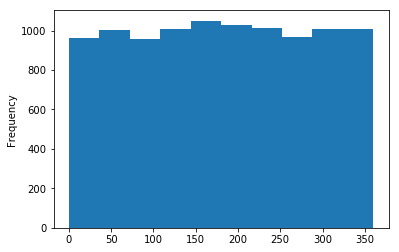

In [41]:
a=0
b=360
samples=10000
core_dist =(np.random.rand(samples) * (b-a) + a)

print( core_dist[:20])
core_dist_series = pd.Series(core_dist)
core_dist_series.plot(kind='hist')
filter_lambda = lambda x:0<x and x<=180

[uniform_between_range(a,b,samples,filter_lambda)/samples for _ in range(30) ]

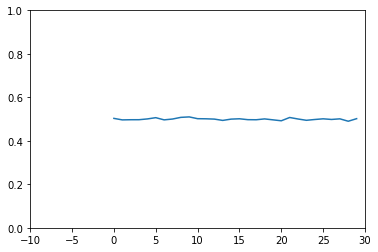

In [132]:
sample_prob_series = pd.Series([uniform_between_range(a,b,samples,filter_lambda)/samples for _ in range(30) ])
sample_prob_series.plot(xlim=(-10,30),ylim=(0,1))

In [17]:

[uniform_between_range(a,b,100000,filter_lambda)/1e6 for _ in range(10) ]
#----------------------------v
#[uniform_between_range(a,b,1e6,filter_lambda)/1e6 for _ in range(10) ]
#oops VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
# https://github.com/numpy/numpy/pull/2891

[0.049896999999999997,
 0.049827999999999997,
 0.050318000000000002,
 0.049896000000000003,
 0.050069000000000002,
 0.050040000000000001,
 0.049997,
 0.049999000000000002,
 0.050167000000000003,
 0.049850999999999999]

In [18]:

[uniform_between_range(a,b,100000,lambda x: 260<x<=290)/1e6 for _ in range(10) ]

[0.0082620000000000002,
 0.0084399999999999996,
 0.0083510000000000008,
 0.0083070000000000001,
 0.0084049999999999993,
 0.0083180000000000007,
 0.0083979999999999992,
 0.0082959999999999996,
 0.0083490000000000005,
 0.0082740000000000001]

In [19]:

[uniform_between_range(a,b,100000,lambda x: 179<x<=180)/1e6 for _ in range(10) ]

[0.00027300000000000002,
 0.00025999999999999998,
 0.00029999999999999997,
 0.00029599999999999998,
 0.00025500000000000002,
 0.00027999999999999998,
 0.00030299999999999999,
 0.00028699999999999998,
 0.000272,
 0.00029700000000000001]

In [20]:
np.mean([uniform_between_range(a,b,100000,lambda x: 179<x<=180)/1e6 for _ in range(10) ])

0.00027730000000000002

In [21]:
#An inexact number is wrong answer;
#Must use precise math to reach exact number:
range_probability_3 = (179-180) / 360
print(range_probability_3)

-0.002777777777777778


In [22]:
1/60.

0.016666666666666666

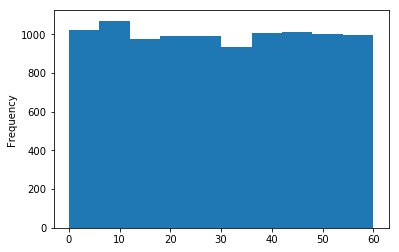

In [43]:
pd.Series(get_uniform_samples(a=0,b=60)).plot(kind='hist')

In [37]:
from scipy import stats


In [45]:
kde_func=stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60)))

In [46]:
kde_func(20)

array([ 0.01648613])

In [47]:
kde_func(30)


array([ 0.01683605])

In [49]:
kde_func(range(0,60))

array([ 0.00827449,  0.01069953,  0.01284795,  0.01450533,  0.01560614,
        0.01621752,  0.01647704,  0.01653021,  0.01649432,  0.01644705,
        0.01642689,  0.01643923,  0.01646848,  0.01649423,  0.01650478,
        0.01650179,  0.01649544,  0.01649512,  0.01650141,  0.01650374,
        0.01648613,  0.01644014,  0.01637816,  0.01633489,  0.01634955,
        0.01643765,  0.01657555,  0.01671357,  0.01680791,  0.01684426,
        0.01683605,  0.01680571,  0.01676976,  0.01673729,  0.01671488,
        0.01670776,  0.01671614,  0.01673301,  0.01674756,  0.01675141,
        0.01674294,  0.01672751,  0.01671506,  0.01671598,  0.01673546,
        0.01676906,  0.01680438,  0.01683023,  0.01684676,  0.01686703,
        0.01690679,  0.01696796,  0.0170251 ,  0.0170208 ,  0.01686936,
        0.01646449,  0.01569128,  0.01445117,  0.01270626,  0.01052882])

In [52]:
np.mean(kde_func(range(0,60)))

0.016070075886410788

In [53]:
#almost equal tol 0.016666....

In [82]:
xs = np.linspace(0,8,200)

In [56]:
8/200.

0.04

In [58]:
xs[1]

0.040201005025125629

In [60]:
xs[1]-xs[0], xs[2]-xs[1]

(0.040201005025125629, 0.040201005025125629)

In [71]:
xs - np.array(list(xs[1:]) + [8])

array([-0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04020101,
       -0.04020101, -0.04020101, -0.04020101, -0.04020101, -0.04

In [72]:
(xs - np.array(list(xs[1:]) + [8])).sum()

-8.0

In [73]:
diffs=(xs - np.array(list(xs[1:]) + [8]))

In [74]:
len(diffs)

200

In [75]:
8/199.

0.04020100502512563

In [76]:
#Oh becuase it divids into 199 partitions, each one is a bit larger than 8/200.

In [84]:
8/200.

0.04

In [85]:
xs = np.linspace(0,60,300)

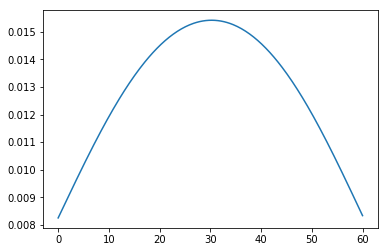

In [93]:
plt.plot(xs, stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60)), 1)(xs))

In [94]:
1/60.

0.016666666666666666

In [99]:
from scipy.integrate import simps

In [105]:
simps(stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60)), 5)(xs), xs)

0.26559113741721641

In [106]:
simps(stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60)), 0.05)(xs), xs)

0.98830754112280639

In [107]:
simps(stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60)))(xs), xs)

0.96195912777826187

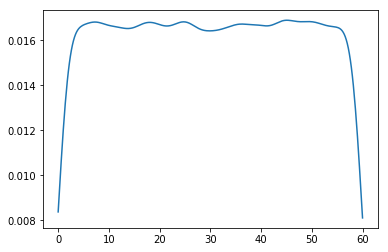

In [114]:
plt.plot(xs, stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60, samples=10**5)))(xs))#, xs)

In [110]:
10**7

10000000

In [118]:
list(filter(lambda x:x==0, get_uniform_samples(a=0,b=60)))

[]

In [121]:
np.random.rand(size=5)

TypeError: rand() got an unexpected keyword argument 'size'

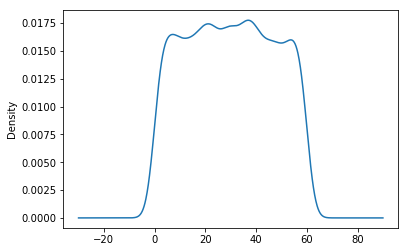

In [122]:
pd.Series(get_uniform_samples(a=0,b=60)).plot(kind='density')

In [124]:
stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60, samples=10**5))).n

100000

In [125]:
stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60, samples=10**5))).factor

0.099999999999999992

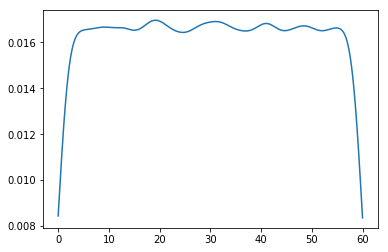

In [128]:
xs = np.linspace(0,60, 1000)
xs2 = np.linspace(-30,90, 2000)
kde =stats.gaussian_kde(pd.Series(get_uniform_samples(a=0,b=60, samples=10**5)))
plt.plot(xs, kde(xs))

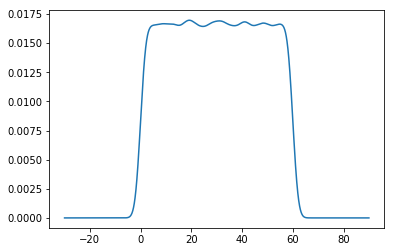

In [129]:

plt.plot(xs2, kde(xs2))

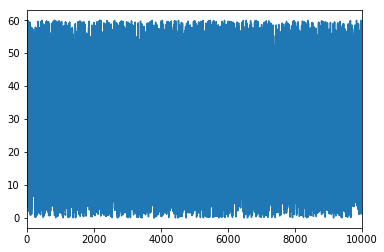

In [133]:
pd.Series(get_uniform_samples(a=0,b=60)).plot()#kind='density')

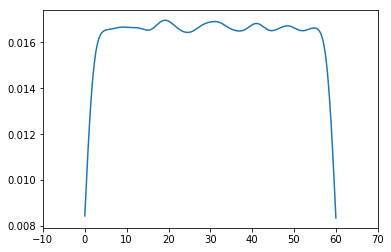

In [135]:
xs = np.linspace(0,60,3000)
pd.Series(index=xs, data=kde(xs)).plot(xlim=(-10,70))

In [137]:
1/60.

0.016666666666666666

In [139]:
s=pd.Series(index=xs, data=kde(xs))

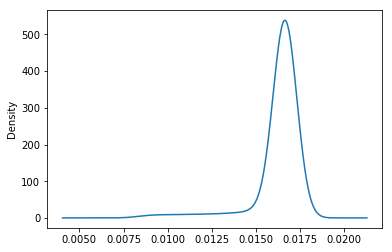

In [140]:
s.plot(kind='density',bw_method=0.5)

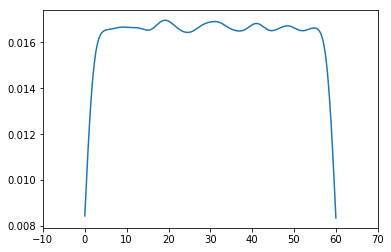

In [144]:
xs = np.linspace(0,60,3000)
pd.Series(index=xs, data=kde(xs)).plot(xlim=(-10,70))

In [145]:
xs = np.linspace(0,60,3000)
s=pd.Series(index=xs, data=kde(xs))#.plot(xlim=(-10,70))

In [148]:
xs[0:5]

array([ 0.        ,  0.02000667,  0.04001334,  0.06002001,  0.08002668])

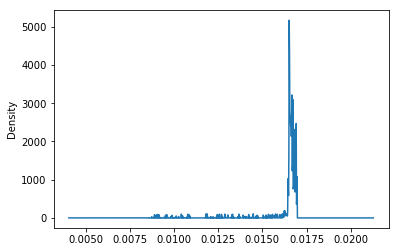

In [149]:
s.plot(kind='density',bw_method=0.001)

In [153]:
uniform_samples = get_uniform_samples(a=0,b=60, samples=10**5)

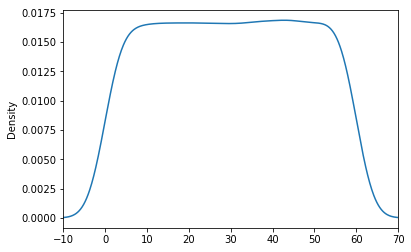

In [154]:
pd.Series(uniform_samples).plot(kind='density', bw_method=0.2, xlim=(-10,70))

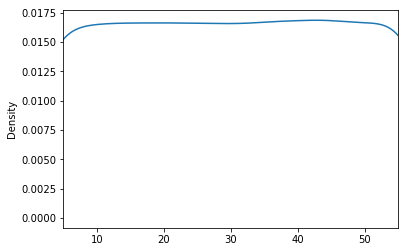

In [155]:
pd.Series(uniform_samples).plot(kind='density', bw_method=0.2, xlim=(5, 55))

In [159]:
#Pandas actually "zooms in"

bw_method = 0.2
kde =stats.gaussian_kde(uniform_samples, bw_method)
how_many = 1000

AttributeError: 'list' object has no attribute 'xlim'

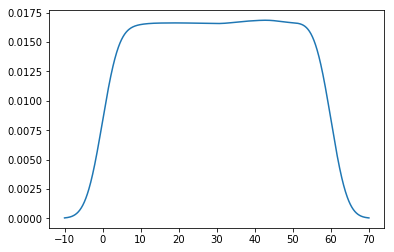

In [162]:
xlim=(-10, 70) 
xs=np.linspace(*xlim, how_many)

plot=plt.plot(xs, kde(xs))
plot.xlim(*xlim)

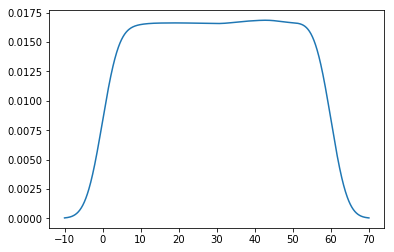

In [166]:
xlim=(-10, 70) 
xs=np.linspace(*xlim, how_many)

plt.xlim = (-5,65)
plot = plt.plot(xs, kde(xs))


## matplotlib OO vs state-machine
At this point I spent some time learning about [matplotlib OO vs state-machine](https://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related) interfaces; how axes (in the OO interface, which is "1 level deeper" than the state-machine interface); are necessary to set xlim and ylim, which I wanted to do, in order to demonstrate that pyplot would try to "(e.g., 'contour this 2-D array')", *considering xlim and ylim*!



In [167]:
![answering density properties](img/explanation density properties.png)

'[answering' is not recognized as an internal or external command,
operable program or batch file.


In [171]:
#Oops the error "'[answering' is not recognized as an internal or external command,operable program or batch file." 

![answering density properties](img/explanation density properties.png)

## Summary
Learned about:
 1. Uniform PDFs (rectangles which integrate to 1)
 2. Stepwise PDFs (noncontinuous functions 
 3. And other "funky" PDFs like "Gaussian"
 
 So will learn about Gaussian after learning the "Central Limit Theorem" (in context of large numbers) in the next lesson